### Problem

**In this program, we have implemented a MLR(Multiple Linear Regression).**


### Team
* [Ankur Rokad](https://github.com/ankurrokad)
* Arathy Ajith
* Rincy Jose
* Akhilesh Muthusamy
* Antony Yesudas


# Importing  Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

# Importing dataset

In [2]:
house_data = pd.read_csv('kc_house_data.csv')

In [3]:
house_data.head(6)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930


In [4]:
house_data.tail(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21603,7852140040,20140825T000000,507250.0,3,2.50,2270,5536,2.0,0,0,...,8,2270,0,2003,0,98065,47.5389,-121.881,2270,5731
21604,9834201367,20150126T000000,429000.0,3,2.00,1490,1126,3.0,0,0,...,8,1490,0,2014,0,98144,47.5699,-122.288,1400,1230
21605,3448900210,20141014T000000,610685.0,4,2.50,2520,6023,2.0,0,0,...,9,2520,0,2014,0,98056,47.5137,-122.167,2520,6023
21606,7936000429,20150326T000000,1007500.0,4,3.50,3510,7200,2.0,0,0,...,9,2600,910,2009,0,98136,47.5537,-122.398,2050,6200
21607,2997800021,20150219T000000,475000.0,3,2.50,1310,1294,2.0,0,0,...,8,1180,130,2008,0,98116,47.5773,-122.409,1330,1265
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,20141015T000000,325000.0,2,0.75,1020,1076,2.0,0,0,...,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [5]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [6]:
house_data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


# Data Visualization

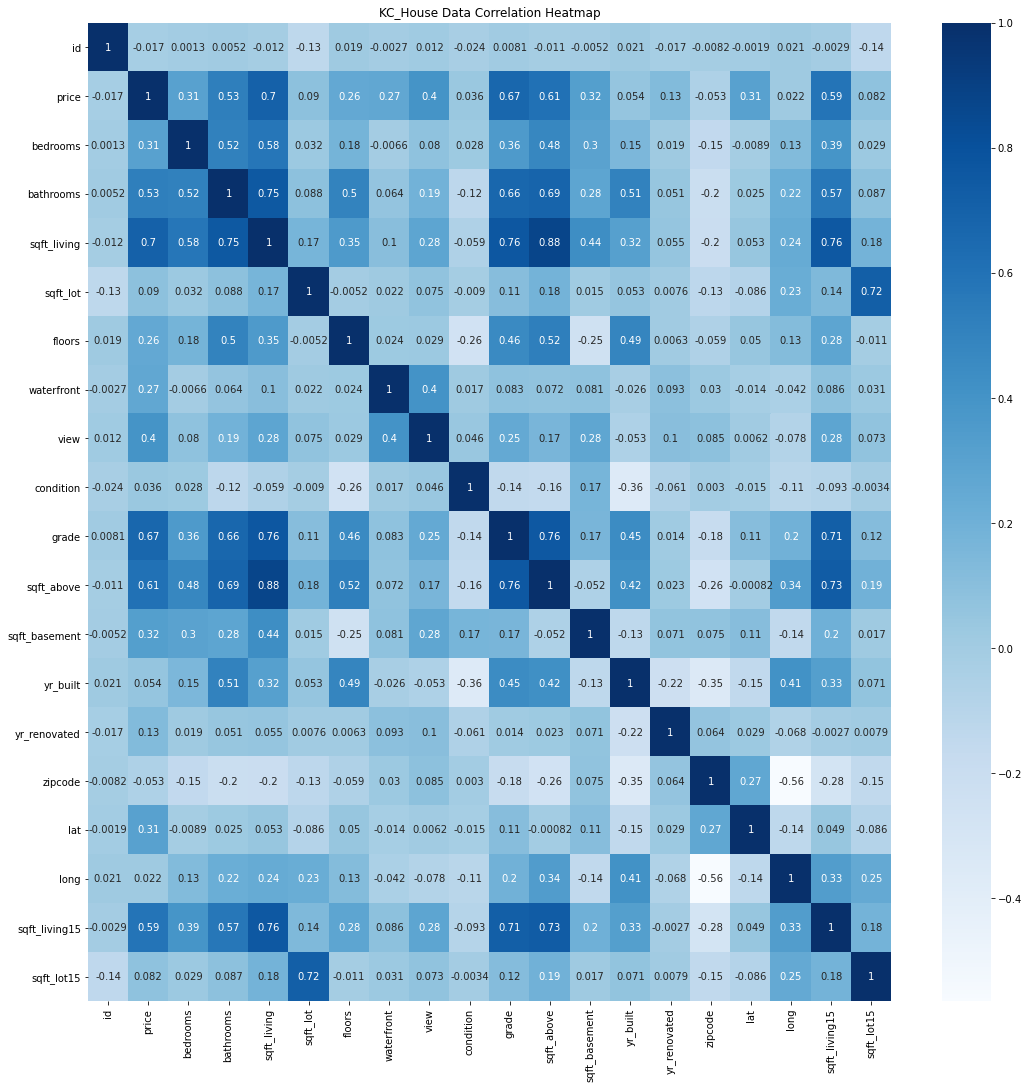

In [7]:
figure, ax = plt.subplots(figsize = (18, 18))
#print(figure, ax)
plt.title("KC_House Data Correlation Heatmap")
sb.heatmap(house_data.corr(), annot = True, cmap='Blues')

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
condition        0.036362
long             0.021626
id              -0.016762
zipcode         -0.053203
Name: price, dtype: float64


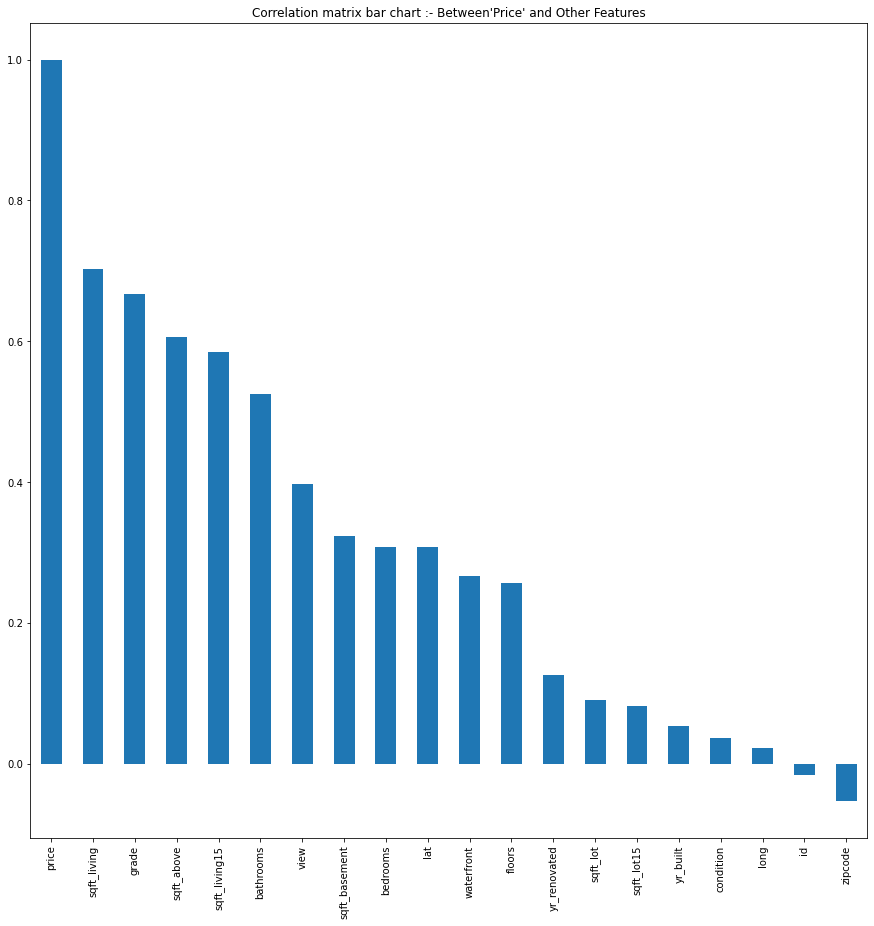

In [8]:
corr_matrix = house_data.corr()
plt.figure(figsize = (15,15))
plt.title("Correlation matrix bar chart :- Between'Price' and Other Features")
housecorr = corr_matrix['price'].sort_values(ascending = False)
print(housecorr)
housecorr.plot.bar()

# Data processing

In [9]:
house_data.columns = ['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15']

In [10]:
x = house_data[['bedrooms', 'bathrooms', 'sqft_living','sqft_above', 'view', 'sqft_basement', 'lat', 'sqft_living15', 'grade']]

In [11]:
y = house_data['price']

In [12]:
print(x.shape)
print(y.shape)

(21613, 9)
(21613,)


In [13]:
x.head(6)

,bedrooms,bathrooms,sqft_living,sqft_above,view,sqft_basement,lat,sqft_living15,grade
0,3,1.00,1180,1180,0,0,47.5112,1340,7
1,3,2.25,2570,2170,0,400,47.7210,1690,7
2,2,1.00,770,770,0,0,47.7379,2720,6
3,4,3.00,1960,1050,0,910,47.5208,1360,7
4,3,2.00,1680,1680,0,0,47.6168,1800,8
5,4,4.50,5420,3890,0,1530,47.6561,4760,11


In [14]:
y

0        221900.0
1        538000.0
2        180000.0
3        604000.0
4        510000.0
           ...   
21608    360000.0
21609    400000.0
21610    402101.0
21611    400000.0
21612    325000.0
Name: price, Length: 21613, dtype: float64

# Splitting Dataset For Training and Testing

In [15]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [16]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(17290, 9)
(4323, 9)
(17290,)
(4323,)


# Regression model

In [17]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [18]:
print("Model Coefficient (b0) = ", regressor.intercept_)
print("Model Coefficients (bi) = ", regressor.coef_)

Model Coefficient (b0) =  -31666149.288895316
Model Coefficients (bi) =  [-3.07694060e+04 -1.26880284e+04 -9.27655200e+15  9.27655200e+15
  9.40075889e+04  9.27655200e+15  6.57833230e+05  4.39094182e+00
  7.98154226e+04]


In [19]:
y_pred_train = regressor.predict(x_train)
y_pred = regressor.predict(x_test)

In [20]:
print(y_pred_train.shape)
print(y_pred.shape)

(17290,)
(4323,)


(0.0, 4200000.0)

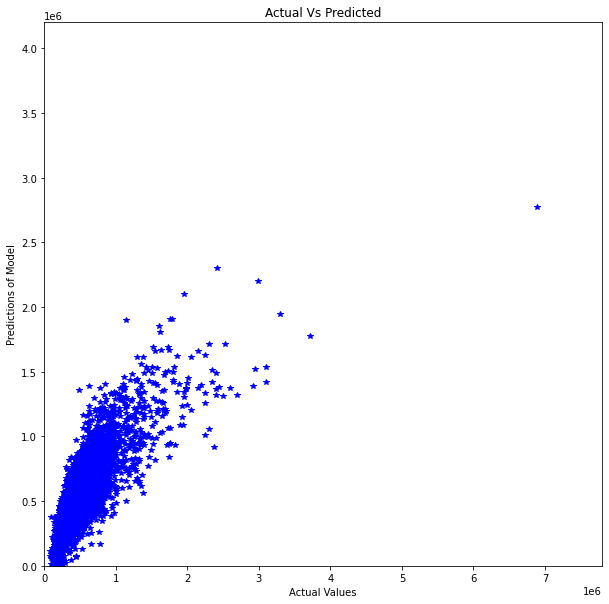

In [21]:
plt.figure(figsize = (10,10))
plt.plot(y_test, y_pred, "*", color = 'blue')
plt.title("Actual Vs Predicted")
plt.xlabel('Actual Values')
plt.ylabel('Predictions of Model')
plt.xlim(0, 7800000)
plt.ylim(0, 4200000)

# Importing Libraries For Regression Metrics

In [22]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from math import sqrt

# Regression Metrics(Training Set)

In [23]:
k = x_train.shape[1]
n = len(x_train)

In [24]:
print('number of features : ', k,',','Total sample in Trained data: ', n)

number of features :  9 , Total sample in Trained data:  17290


In [25]:
M_A_E = mean_absolute_error(y_train, y_pred_train)
M_S_E = mean_squared_error(y_train, y_pred_train)
R_M_S_E = float(format(np.sqrt(mean_squared_error(y_train, y_pred_train)),'.2f'))
M_A_P_E = np.mean(np.abs((y_train - y_pred_train) / y_train)) * 100
M_P_E = np.mean((y_train - y_pred_train) / y_train) * 100
r2 = r2_score(y_train, y_pred_train)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

In [26]:
print('Mean Squared Error = ',M_S_E)
print('Root Mean Squared Error = ',R_M_S_E)
print('Mean Absolute Error = ',M_A_E)
print('Mean Absolute Percentage Error = ',M_A_P_E)
print('Mean Percentage Error = ', M_P_E)
print('R2 Score = ', r2)
print('Adjusted R2 =', adj_r2)

Mean Squared Error =  50224207051.80611
Root Mean Squared Error =  224107.58
Mean Absolute Error =  138005.8905404479
Mean Absolute Percentage Error =  26.680656032984036
Mean Percentage Error =  -6.022330534267111
R2 Score =  0.6365513228831199
Adjusted R2 = 0.6363620266971215


# Regression Metrics (Test Set)

In [27]:
k = x_test.shape[1]
n = len(x_test)

In [28]:
print('number of features : ', k,',','Total sample in Test data: ', n)

number of features :  9 , Total sample in Test data:  4323


In [29]:
M_A_E = mean_absolute_error(y_test, y_pred)
M_S_E = mean_squared_error(y_test, y_pred)
R_M_S_E = float(format(np.sqrt(mean_squared_error(y_test, y_pred)),'.2f'))
M_A_P_E = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
M_P_E = np.mean((y_test - y_pred) / y_test) * 100
r2 = r2_score(y_test, y_pred)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

In [30]:
print('Mean Squared Error = ',M_S_E)
print('Root Mean Squared Error = ',R_M_S_E)
print('Mean Absolute Error = ',M_A_E)
print('Mean Absolute Percentage Error = ',M_A_P_E)
print('Mean Percentage Error = ', M_P_E)
print('R2 Score = ', r2)
print('Adjusted R2 =', adj_r2) 

Mean Squared Error =  41786832442.815895
Root Mean Squared Error =  204418.28
Mean Absolute Error =  133451.89822414896
Mean Absolute Percentage Error =  26.834573123414152
Mean Percentage Error =  -6.361129808511714
R2 Score =  0.6550263973529912
Adjusted R2 = 0.654306535905316


# Number of Independant Varibales Increased

In [31]:
#x = house_data[['bedrooms', 'bathrooms', 'sqft_living','sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
#'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode','lat', 'long', 'sqft_living15', 'sqft_lot15']]

x = house_data[['bedrooms', 'bathrooms', 'sqft_living','sqft_lot', 'floors','waterfront', 'view', 'grade',
                'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated','lat', 'sqft_living15','sqft_lot15']]


In [32]:
y = house_data['price']

# Splitting Dataset for Training And Testing

In [33]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [34]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(17290, 15)
(4323, 15)
(17290,)
(4323,)


# Regression Model

In [35]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [36]:
print("Model Coefficient (b0) = ", regressor.intercept_)
print("Model Coefficients (bi) = ", regressor.coef_)

Model Coefficient (b0) =  -20859843.096118093
Model Coefficients (bi) =  [-3.50760898e+04  4.72692709e+04  1.13244659e+02  9.31508958e-02
  1.97962911e+03  5.80377933e+05  5.13776757e+04  9.95982505e+04
  6.61905286e+01  4.70541301e+01 -2.94516877e+03  1.32359913e+01
  5.47589413e+05  1.63982190e+01 -4.53032544e-01]


In [37]:
y_pred_train = regressor.predict(x_train)
y_pred = regressor.predict(x_test)

(0.0, 4200000.0)

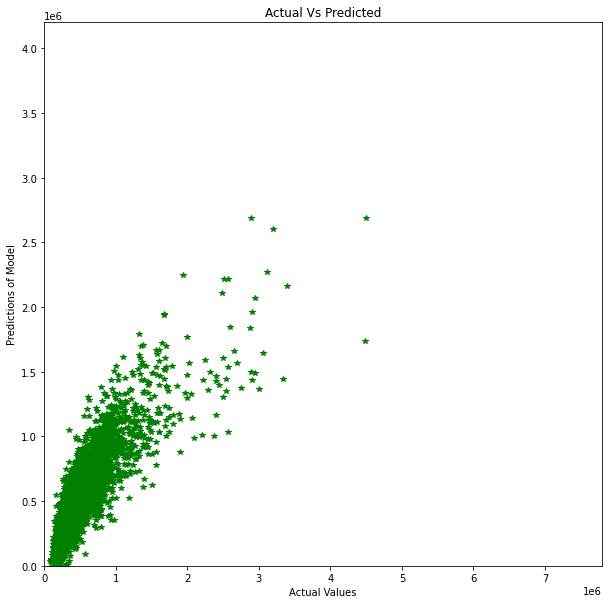

In [38]:
plt.figure(figsize = (10,10))
plt.plot(y_test, y_pred, "*", color = 'green')
plt.title("Actual Vs Predicted")
plt.xlabel('Actual Values')
plt.ylabel('Predictions of Model')
plt.xlim(0, 7800000)
plt.ylim(0, 4200000)

# Regression Metrics(Training Set)

In [39]:
k = x_train.shape[1]
n = len(x_train)

In [40]:
print('number of features : ', k,',','Total sample in Test data: ', n)

number of features :  15 , Total sample in Test data:  17290


In [41]:
M_A_E = mean_absolute_error(y_train, y_pred_train)
M_S_E = mean_squared_error(y_train, y_pred_train)
R_M_S_E = float(format(np.sqrt(mean_squared_error(y_train, y_pred_train)),'.2f'))
M_A_P_E = np.mean(np.abs((y_train - y_pred_train) / y_train)) * 100
M_P_E = np.mean((y_train - y_pred_train) / y_train) * 100
r2 = r2_score(y_train, y_pred_train)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

In [42]:
print('Mean Squared Error = ',M_S_E)
print('Root Mean Squared Error = ',R_M_S_E)
print('Mean Absolute Error = ',M_A_E)
print('Mean Absolute Percentage Error = ',M_A_P_E)
print('Mean Percentage Error = ', M_P_E)
print('R2 Score = ', r2)
print('Adjusted R2 =', adj_r2)

Mean Squared Error =  42450551966.04021
Root Mean Squared Error =  206035.32
Mean Absolute Error =  127710.06140810905
Mean Absolute Percentage Error =  25.647966506188187
Mean Percentage Error =  -4.308602564121005
R2 Score =  0.6890294525087851
Adjusted R2 = 0.6887594190357986


# Regression Metrics(Test Set)

In [43]:
k = x_test.shape[1]
n = len(x_test)

In [44]:
print('number of features : ', k,',','Total sample in Test data: ', n)

number of features :  15 , Total sample in Test data:  4323


In [45]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from math import sqrt

M_A_E = mean_absolute_error(y_test, y_pred)
M_S_E = mean_squared_error(y_test, y_pred)
R_M_S_E = float(format(np.sqrt(mean_squared_error(y_test, y_pred)),'.2f'))
M_A_P_E = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
M_P_E = np.mean((y_test - y_pred) / y_test) * 100
r2 = r2_score(y_test, y_pred)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

In [46]:
print('Mean Squared Error = ',M_S_E)
print('Root Mean Squared Error = ',R_M_S_E)
print('Mean Absolute Error = ',M_A_E)
print('Mean Absolute Percentage Error = ',M_A_P_E)
print('Mean Percentage Error = ', M_P_E)
print('R2 Score = ', r2)
print('Adjusted R2 =', adj_r2) 

Mean Squared Error =  37938984669.46774
Root Mean Squared Error =  194779.32
Mean Absolute Error =  125160.6813990452
Mean Absolute Percentage Error =  25.427608513987277
Mean Percentage Error =  -2.897292298828594
R2 Score =  0.7032109981451379
Adjusted R2 = 0.7021773703234934
